In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np
import glob 

In [24]:
# archivo = "../../data/fluke_01-07-2021_05-07-2021.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1,encoding='iso-8859-1')
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp

fluke = glob.glob("../data/fluke*.csv")
fluke = pd.concat([importa_fluke(archivo) for archivo in fluke],axis=0)
fluke   =   fluke.resample('10S').mean()
fluke.sort_index(inplace=True)
fluke.to_csv("../data/Afluke.csv")
fluke

,fluke
tiempo,
2021-09-23 13:20:00,439.8
2021-09-23 13:20:10,439.3
2021-09-23 13:20:20,436.3
2021-09-23 13:20:30,436.0
2021-09-23 13:20:40,433.9
...,...
2021-09-30 11:29:40,652.0
2021-09-30 11:29:50,648.5
2021-09-30 11:30:00,644.5


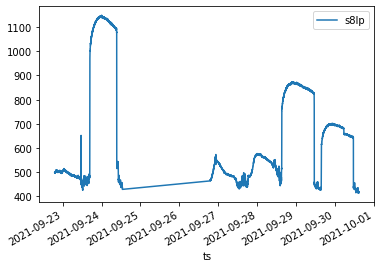

In [18]:
s8lp = glob.glob("../data/s8lp*.csv")
s8lp = pd.concat([pd.read_csv(archivo,index_col=0,parse_dates=True) for archivo in s8lp],axis=0)
# s8lp.drop_duplicates(subset=None, keep='first', inplace=True)
s8lp.plot()
s8lp    =    s8lp.resample('10S').mean()
s8lp.sort_index(inplace=True)
s8lp.to_csv("../data/As8lp.csv")


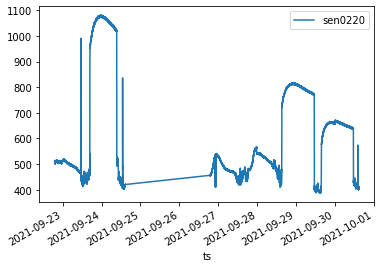

In [19]:
sen0220 = glob.glob("../data/sen0220*")
sen0220 = pd.concat([pd.read_csv(archivo,index_col=0,parse_dates=True) for archivo in sen0220],axis=0)
# sen0220.drop_duplicates(subset=None, keep='first', inplace=True)
sen0220.plot()
sen0220 = sen0220.resample('10S').mean()
sen0220.sort_index(inplace=True)
sen0220.to_csv("../data/Asen0220.csv")

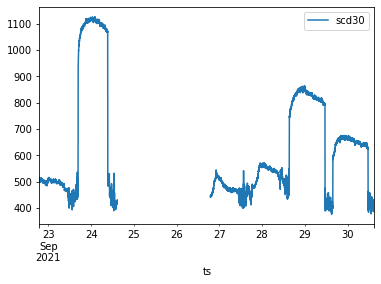

In [20]:
scd30 = glob.glob("../data/scd30*")
scd30 = pd.concat([pd.read_csv(archivo,index_col=0,parse_dates=True) for archivo in scd30],axis=0)
# scd30.drop_duplicates(subset=None, keep='first', inplace=True)
scd30   =   scd30.resample('10S').mean()
scd30.plot()
scd30.to_csv("../data/Ascd30.csv")

In [25]:
sensores = pd.concat([fluke,s8lp,sen0220,scd30],axis=0)
sensores.sort_index(inplace=True)
sensores.to_csv("../data/sensores.csv")
sensores

,fluke,s8lp,sen0220,scd30
2021-09-22 19:00:00,NaN,497.5,NaN,NaN
2021-09-22 19:00:00,NaN,NaN,NaN,515.0
2021-09-22 19:00:00,NaN,NaN,510.5,NaN
2021-09-22 19:00:10,NaN,NaN,NaN,516.0
2021-09-22 19:00:10,NaN,NaN,510.5,NaN
...,...,...,...,...
2021-09-30 14:59:40,NaN,419.0,NaN,NaN
2021-09-30 14:59:40,NaN,NaN,NaN,400.5
2021-09-30 14:59:50,NaN,419.0,NaN,NaN
2021-09-30 14:59:50,NaN,NaN,411.0,NaN


In [27]:
sensores = pd.read_csv("../data/sensores.csv",index_col=0,parse_dates=True)

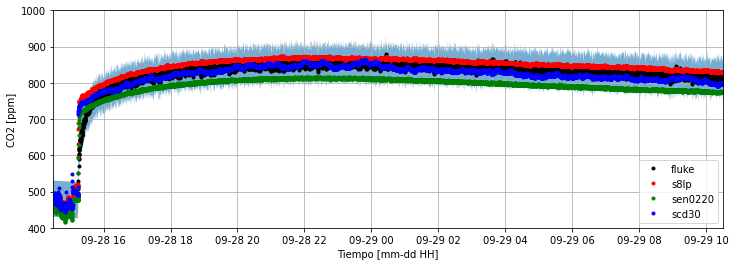

In [28]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-28 14:30") 
fecha2 = fecha1 + pd.Timedelta("20H")

ax.plot(sensores.fluke,"k.",label='fluke')
ax.plot(sensores.s8lp,"r.",label='s8lp')
ax.plot(sensores.sen0220,"g.",label='sen0220')
ax.plot(sensores.scd30,"b.",label='scd30')

fluke = sensores.fluke
fluke.dropna(axis=0,how="all",inplace=True)
ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=.6)

ax.set_ylim(400,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
# ax.set_title("Mediciones CO2")
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

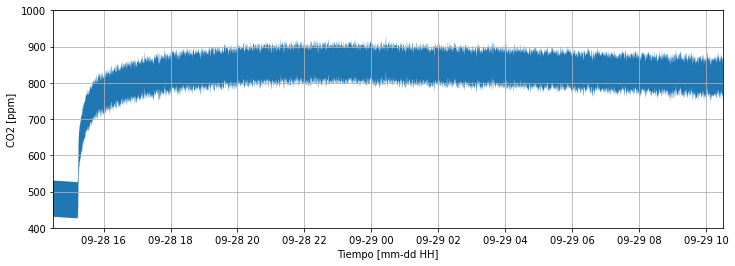

In [29]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-28 14:30") 
fecha2 = fecha1 + pd.Timedelta("20H")

# ax.plot(sensores.fluke,"k.",label='fluke')
# ax.plot(sensores.s8lp,"r.",label='s8lp')
# ax.plot(sensores.sen0220,"g.",label='sen0220')
# ax.plot(sensores.scd30,"b.",label='scd30')

fluke = sensores.fluke
fluke.dropna(axis=0,how="all",inplace=True)
ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=1.0)

ax.set_ylim(400,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
# ax.set_title("Mediciones CO2")
# ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

2021-09-22 19:00:00   NaN
2021-09-22 19:00:00   NaN
2021-09-22 19:00:00   NaN
2021-09-22 19:00:10   NaN
2021-09-22 19:00:10   NaN
                       ..
2021-09-30 14:59:40   NaN
2021-09-30 14:59:40   NaN
2021-09-30 14:59:40   NaN
2021-09-30 14:59:50   NaN
2021-09-30 14:59:50   NaN
Name: fluke, Length: 229023, dtype: float64